In [20]:
# Paso 1: Carga del conjunto de datos
import pandas as pd
from tabulate import tabulate

#  ruta archivo CSV
data = pd.read_csv('pet_adoption_data.csv')

In [21]:
# Paso 2: Visualización de una muestra de datos
print("Muestra de los datos:")
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

Muestra de los datos:
+---+-------+---------+------------------+-----------+--------+--------+--------------------+------------+-----------------+-------------------+-------------+---------------+--------------------+
|   | PetID | PetType |      Breed       | AgeMonths | Color  |  Size  |      WeightKg      | Vaccinated | HealthCondition | TimeInShelterDays | AdoptionFee | PreviousOwner | AdoptionLikelihood |
+---+-------+---------+------------------+-----------+--------+--------+--------------------+------------+-----------------+-------------------+-------------+---------------+--------------------+
| 0 |  500  |  Bird   |     Parakeet     |    131    | Orange | Large  | 5.039767822529515  |     1      |        0        |        27         |     140     |       0       |         0          |
| 1 |  501  | Rabbit  |      Rabbit      |    73     | White  | Large  | 16.086726854616735 |     0      |        0        |         8         |     235     |       0       |         0          

In [22]:
# Paso 3: Normalización de los datos
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = data.drop(columns=['PetID', 'AdoptionLikelihood'])
y = data['AdoptionLikelihood']

# Codificar variables categóricas a numéricas (por ejemplo, usando one-hot encoding)
X = pd.get_dummies(X)  # Esto convertirá columnas categóricas como 'PetType' a numéricas

# Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)



In [23]:

# Paso 4: Construcción del modelo de red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Inicializar el modelo
model = Sequential()

# Añadir capas densas
model.add(Dense(64, activation='relu', input_shape=(X_normalized.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


In [ ]:

# Paso 5: Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Paso 6: Entrenamiento del modelo
history = model.fit(X_normalized, y, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
51/51 [==============================] - 1s 6ms/step - loss: 0.5703 - accuracy: 0.6841 - val_loss: 0.6709 - val_accuracy: 0.6443
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8399 - val_loss: 0.7704 - val_accuracy: 0.6915
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.8991 - val_loss: 0.9044 - val_accuracy: 0.7090
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9190 - val_loss: 1.0666 - val_accuracy: 0.7214
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9321 - val_loss: 1.2089 - val_accuracy: 0.7214
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1485 - accuracy: 0.9402 - val_loss: 1.3746 - val_accuracy: 0.7189
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9477 - val_loss: 1.5027 - val_accuracy: 0.7214
Epoch 8/50
51/51 [==

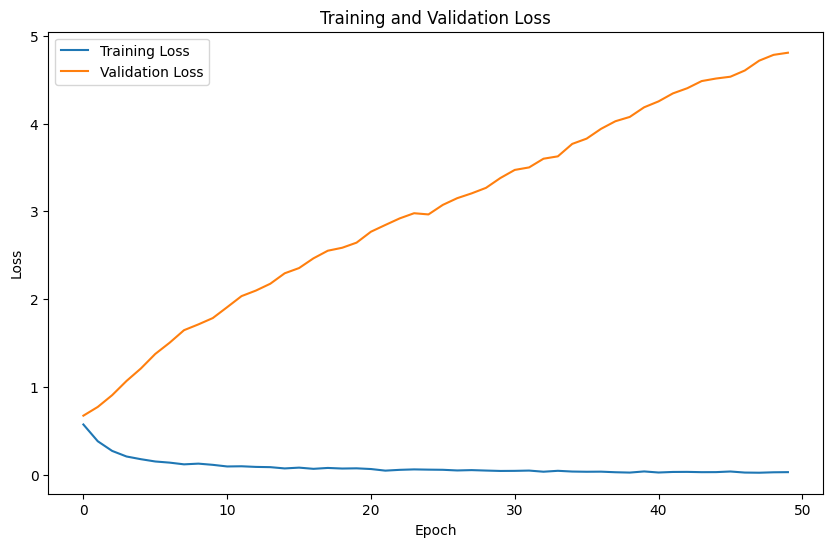

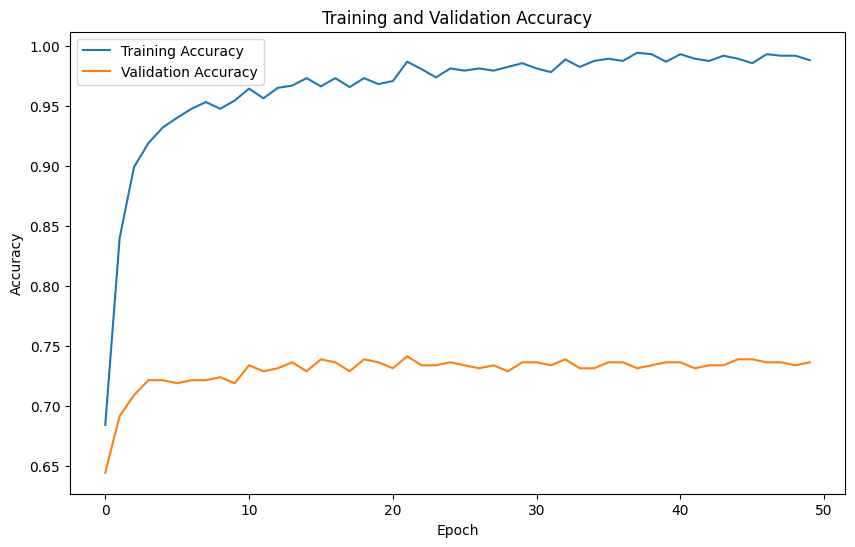

In [ ]:
# Paso 7: Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar la pérdida del entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar la precisión del entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [26]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Hacer predicciones
y_pred_prob = model.predict(X_normalized)
y_pred = (y_pred_prob > 0.5).astype(int)

# Obtener el informe de clasificación como string
report = classification_report(y, y_pred, target_names=['Unlikely', 'Likely'], output_dict=True)

# Convertir el informe a una tabla usando tabulate
headers = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
rows = []
for class_name, metrics in report.items():
    if class_name in ['accuracy', 'macro avg', 'weighted avg']:
        continue  # No mostrar estas filas en la tabla
    rows.append([class_name, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])

print("Informe de Clasificación:")
print(tabulate(rows, headers=headers, tablefmt='pretty'))



63/63 [==============================] - 0s 5ms/step
Informe de Clasificación:
+----------+--------------------+---------------------+---------------------+---------+
|  Class   |     Precision      |       Recall        |      F1-Score       | Support |
+----------+--------------------+---------------------+---------------------+---------+
| Unlikely | 0.705832628909552  | 0.6194362017804155  |  0.659818253654682  |  1348   |
|  Likely  | 0.3774271844660194 | 0.47192716236722304 | 0.41942009440323663 |   659   |
+----------+--------------------+---------------------+---------------------+---------+


In [27]:
# Paso 9: Predicción de una muestra de datos de prueba
sample_idx = 0  # índice según la muestra que se desea predecir
sample = X_normalized[sample_idx].reshape(1, -1)
prediction = model.predict(sample)

print(f'Predicción para la muestra {sample_idx}: {prediction[0][0]}')

1/1 [==============================] - 0s 21ms/step
Predicción para la muestra 0: 0.2932299077510834


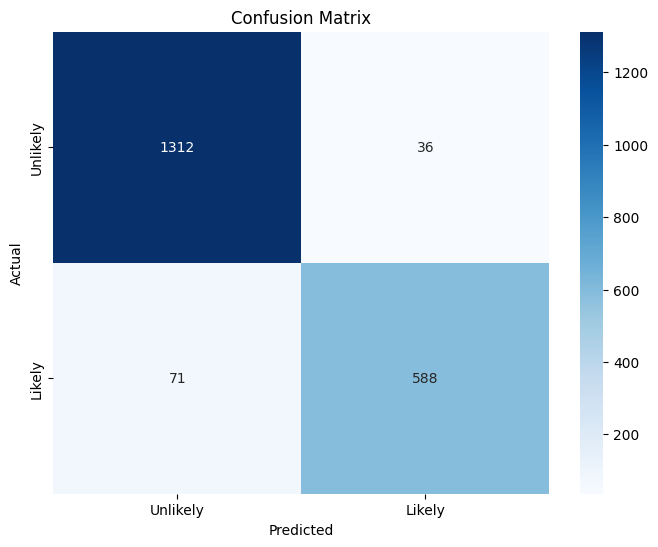

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

63/63 [==============================] - 0s 3ms/step


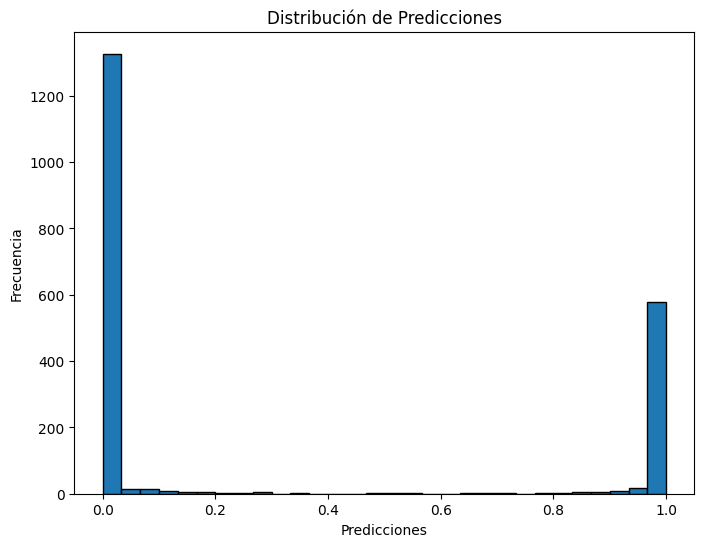

In [16]:
import matplotlib.pyplot as plt

# Obtener todas las predicciones del modelo
predictions = model.predict(X_normalized).flatten()  # flatten() para convertir a un arreglo unidimensional

# Graficar histograma de las predicciones
plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=30, edgecolor='black')
plt.title('Distribución de Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Frecuencia')
plt.show()


<ipython-input-17-0e116e3da99f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions, shade=True)


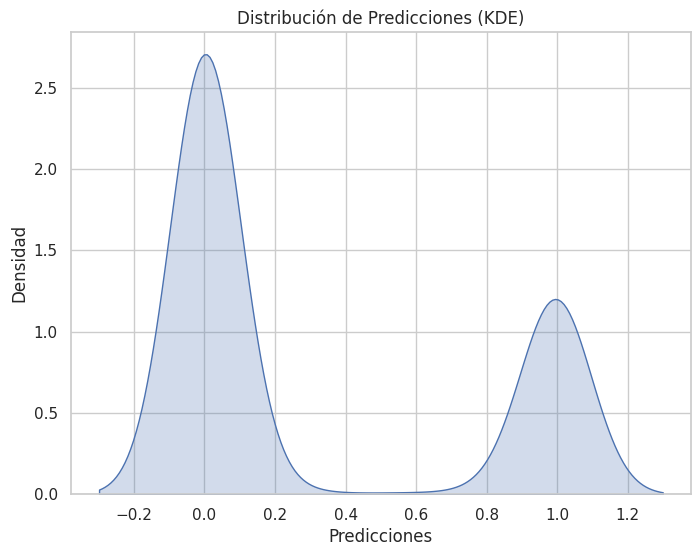

In [17]:
import seaborn as sns

# Configurar el estilo de los gráficos de seaborn
sns.set(style="whitegrid")

# Crear gráfico de KDE (Kernel Density Estimation)
plt.figure(figsize=(8, 6))
sns.kdeplot(predictions, shade=True)
plt.title('Distribución de Predicciones (KDE)')
plt.xlabel('Predicciones')
plt.ylabel('Densidad')
plt.show()